In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import os
import numpy as np

# import standardizer from sklearn
from sklearn.preprocessing import StandardScaler

# import pca from sklearn
from sklearn.decomposition import PCA
import seaborn as sns

In [10]:
dir_path = 'data/harth'

files = os.listdir(dir_path)

df_data = pd.DataFrame()

for file in files:
    if file.find("harth") > -1:
        pass
    else:
        df_temp = pd.read_csv(dir_path + "/" + file, sep=',')
        df_data = pd.concat([df_data, df_temp], ignore_index=True)
    
df_data = df_data.drop(['Unnamed: 0', "index"], axis=1)
df_data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-2.409951,-0.046434,0.014000,-0.265595,-0.743889,0.562652,6
1,2019-01-12 00:00:00.020,-1.562595,0.171910,0.435377,-0.406350,-0.215105,0.853667,6
2,2019-01-12 00:00:00.040,-1.587608,0.639000,-0.097640,-1.684106,-0.178350,-0.286586,6
3,2019-01-12 00:00:00.060,-0.217441,-0.085718,-0.275723,-0.509119,0.830213,-0.487134,6
4,2019-01-12 00:00:00.080,0.873471,-0.208949,-0.111485,-0.856530,1.145938,-0.819877,6


In [19]:
print(np.unique(df_data.label.values, return_counts=True))
print(len(df_data.label.unique()))

(array([  1,   2,   3,   4,   5,   6,   7,   8,  13,  14, 130, 140]), array([1197155,  291356,  254839,   76217,   67253,  743480, 2902703,
        428898,  393963,   55814,   41785,    7865]))
12


In [17]:
features = ["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]

X = df_data[features]

X = StandardScaler().fit_transform(X)

X.shape

(6461328, 6)

In [20]:
# cluster X using k means

clstr = KMeans(n_clusters=12, random_state=0).fit(X)

clstr.cluster_centers_

/root/miniconda3/envs/standard_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.29148343,  0.10766114,  0.53181456,  0.49241775,  0.0318202 ,
         0.74296201],
       [ 2.39498176,  3.96073194, -0.12948324,  0.69433441, -1.45551831,
        -0.36451541],
       [-0.19420402, -0.27284147,  1.28462358, -1.04346255,  0.4429586 ,
         0.43936884],
       [ 0.94626464,  0.20098197, -1.68502714,  0.8407007 ,  0.04438951,
         0.80138323],
       [-0.22938431,  0.10442624,  0.43576402, -0.55745958,  0.01492065,
        -0.75321375],
       [ 2.6882835 , -1.3489683 , -0.30355763,  0.00461852, -2.21305927,
        -1.80973537],
       [ 1.50836909,  0.22920237,  2.13665786,  0.83384338, -0.25099332,
        -1.45522213],
       [-2.58557231, -0.56885259, -0.31307338, -2.78052128, -2.81970288,
        -0.56036045],
       [ 2.11638405, -3.5944586 , -0.52866813,  1.16589385,  2.48212052,
        -0.22793348],
       [-1.85594978,  0.40787933, -0.25235582, -2.7043222 ,  2.03238893,
        -1.23131652],
       [-0.15519607,  0.03759289, -0.50086097,  0.

In [22]:
clstr.score(X)

-14717811.711243471

In [31]:
pca = PCA(n_components=2).fit_transform(X=X, )

<Axes: >

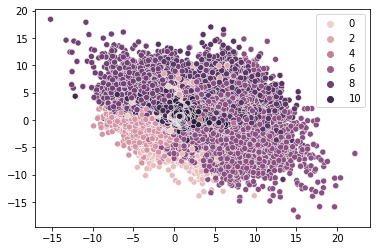

In [35]:
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=clstr.labels_)

# Split data in different samples with varying sizes

In [38]:
sample_sizes = [1000, 10000, 10**6, 2*10**6]

for s in sample_sizes:
    df_sample = df_data.sample(n=s, random_state=42)
    
    df_sample.iloc[:,1:].to_csv(dir_path + "/" + f'harth_dataset_{s}.csv', index=False)